# <div align='center'>Introduction to Python for data analysis: Helpful tips and modules</div>

## Pretty-printing


The ```pprint()``` function from the ```pprint``` module helps to print more nicely complex data structures, making the output better formatted and much more readable.

<u>Example with standard ```print()```:</u>

In [1]:
Names     = ['Matthias','John','Lukas','George','Jonathan','David']
Ages      = [23,45,33,54,32,38]
Countries = ['US','US','Germany','US','Argentina','Spain']

Users     = {ID : {'Name': name,'Age':Ages[ID],'Country':Countries[ID]} for ID,name in enumerate(Names)}
print(Users)

{0: {'Name': 'Matthias', 'Age': 23, 'Country': 'US'}, 1: {'Name': 'John', 'Age': 45, 'Country': 'US'}, 2: {'Name': 'Lukas', 'Age': 33, 'Country': 'Germany'}, 3: {'Name': 'George', 'Age': 54, 'Country': 'US'}, 4: {'Name': 'Jonathan', 'Age': 32, 'Country': 'Argentina'}, 5: {'Name': 'David', 'Age': 38, 'Country': 'Spain'}}


<u>Example with ```pprint()```:</u>

In [2]:
from pprint import pprint
pprint(Users,sort_dicts=False)

{0: {'Name': 'Matthias', 'Age': 23, 'Country': 'US'},
 1: {'Name': 'John', 'Age': 45, 'Country': 'US'},
 2: {'Name': 'Lukas', 'Age': 33, 'Country': 'Germany'},
 3: {'Name': 'George', 'Age': 54, 'Country': 'US'},
 4: {'Name': 'Jonathan', 'Age': 32, 'Country': 'Argentina'},
 5: {'Name': 'David', 'Age': 38, 'Country': 'Spain'}}


## The ```os``` and ```sys``` modules

### Some helpful functions from the ```sys``` module

The ```sys``` module provides various functions and variables that are used to manipulate different parts of the Python runtime environment and is part of the Python's standard library.

First, let's import the ```sys``` module

```
import sys
```

<u>Some useful functions:</u>

* Use ```sys.exit([arg])``` to exit the program. The optional argument ```arg`` can be of any type, if it is an integer, zero is considered successful termination, any non-zero value is considered abnormal termination.

* Use ```sys.getsizeof(object)``` to get the size of ```object``` in bytes. The object can be of any type.

For more information about the above functions or other functions from the ```sys``` module, please look at https://docs.python.org/3/library/sys.html

### Some helpful functions from the ```os``` module

The ```os``` module in Python provides functions for interacting with the operating system and is part of the Python's standard library.

First, let's import the ```os``` module

```
import os
```

<u>Some useful functions:</u>

* Use ```os.listdir()``` to list directories/files on a directory.

* Use ```os.path.exists()``` to check if a given path/directory exists

* Use ```os.makedirs()``` to create directories. If one wants to create ```'path/folder'``` and path doesn't exists, ```makedirs()``` will create both (path and folder within)

* Use ```os.system``` to execute a command (a string) in a subshell

For more information about the above functions or other functions from the ```os``` module, please look at
https://docs.python.org/3/library/os.html

## The ```typing``` module

### ```Optional``` and ```NoReturn``` for type hints

```Optional[str]``` signals that a variable can be ```None``` or of type ```str``` (```str``` can be replaced by any other type).

In [3]:
from typing import Optional, NoReturn

def print_message(var: Optional[str]) -> NoReturn:
    if var:
        print(var)
            
string_1 = None
print_message(string_1)

string_2 = ''
print_message(string_2)

string_3 = 'Example message'
print_message(string_3)

Example message


### Type aliases

It is possible to make a new type which is an alias of another type, this could be used to simplify the syntax and help the reader.

**Example:**

In [4]:
from typing import List

Vector = List[int]
def my_function(vec: Vector) -> int:
    return sum(vec)

# Return sum of [1,2,3,4]
print(my_function([1,2,3,4]))

10


**Note:** I used ```List``` instead of ```list```, this works similarly for other types (```dict->Dict```, etc)

**Note 2:** Since Python 3.9+, you can avoid the import and just use ```list[int]``` (similarly for other types)

### ```Union``` for type hints

```Union[type_1,type_2]``` can be used to signal that a variable can be of type ```type_1``` or of the type ```type_2```.

**Note:** Since Python 3.10, one can achieve the same with ```type_1 | type_2```

In [5]:
from typing import Union

Vector = List[Union[int,float]]
def sum_numbers(vec: Vector) -> Union[int,float]:
    return sum(vec)

print(sum_numbers([1.3,2.7]))
print(sum_numbers([1,2]))

4.0
3


### ```NewType``` for type hints

```NewType``` can be used to create a new type.

**Example:**

In [6]:
from typing import NewType

UserID = NewType('UserID',int)

# Create 10 users
Users = [UserID(n) for n in range(10)]

# print all user ids
for id in Users:
    print(f'UserID = {id}')

UserID = 0
UserID = 1
UserID = 2
UserID = 3
UserID = 4
UserID = 5
UserID = 6
UserID = 7
UserID = 8
UserID = 9


## Get current date and time with the ```datetime``` module

In [7]:
from datetime import datetime
now = datetime.now()
print ("Current date and time : ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))

Current date and time : 
2022-01-19 09:53:35


Let's print the date on different formats

In [8]:
# dd/mm/YY
dd_mm_yy = now.strftime("%d/%m/%Y")
print(f'Today: {dd_mm_yy}')

# Textual month day,year
m_d_y = now.strftime("%B %d, %Y")
print(f'Today: {m_d_y}')

# mm/dd/yy
mm_dd_yy = now.strftime("%m/%d/%y")
print(f'Today: {mm_dd_yy}')

# Month abbreviation-day-year
a_m_d_y = now.strftime("%b-%d-%Y")
print(f'Today: {a_m_d_y}')

Today: 19/01/2022
Today: January 19, 2022
Today: 01/19/22
Today: Jan-19-2022


**Note:** Alternatively, if you only need the date, you could replace ```now``` by ```today``` and put the following two lines before using ```today```:

```
from datetime import date
today = date.today()
```

Let's print only the time now:

In [9]:
current_time = now.strftime("%H:%M:%S")
print(f'{current_time = }')

current_time = '09:53:35'


## Defaultdict from the collections module

Defaultdict is a container present in the module ```collections```.

Defaultdict is a sub-class of the dictionary class that returns a dictionary-like object.

The functionality of both dictionaries and defualtdict are almost exactly the same except for the fact that ```defualtdict``` never raises a ```KeyError```. It provides a default value for keys that doesn't exist.

<u>Syntax:</u>
```
defaultdict(default_factory)
```

where ```default_factory``` is a function returning the default value for non-existing keys. If this argument is absent, the dictionray raises a KeyError.

**Example:**

In [10]:
from collections import defaultdict
 
def default_value():
    return "Not available"
     
my_defaultdict = defaultdict(default_value)
my_defaultdict["a"] = 1
my_defaultdict["b"] = 2
 
print(f'{my_defaultdict["a"] = }')
print(f'{my_defaultdict["b"] = }')
print(f'{my_defaultdict["c"] = }')

my_defaultdict["a"] = 1
my_defaultdict["b"] = 2
my_defaultdict["c"] = 'Not available'


## How to know how much time is spent on something?

Let's say I want to know how much is spent on looping over 10000 numbers:

In [11]:
import time

start = time.perf_counter()
for i in range(10000):
    pass
end = time.perf_counter()
print('Time spent looping over 10000 numbers = {} seconds'.format(end-start))

Time spent looping over 10000 numbers = 0.0004634568467736244 seconds


Let's use this now to show that using list comprehension is faster than doing a 'traditional' loop.

In [12]:
def f(x: int) -> int:
    return x*x

# make a loop and append value to list
start_1 = time.perf_counter()
list_1 = []
for i in range(100):
    list_1.append(f(i))
end_1 = time.perf_counter()

# use now comprehension
start_2 = time.perf_counter()
list_2 = [f(i) for i in range(100)]
end_2 = time.perf_counter()

print('Time w/o comprehension = {}'.format(end_1-start_1))
print('Time w/ comprehension = {}'.format(end_2-start_2))

Time w/o comprehension = 0.00010294979438185692
Time w/ comprehension = 7.404200732707977e-05


Let's now show that using ```enumerate(list_2)``` is faster than doing ```range(len(list_2))```

In [13]:
# using range(len())
start_1 = time.perf_counter()
for i in range(len(list_2)):
    pass
end_1 = time.perf_counter()

# using enumerate()
start_2 = time.perf_counter()
for i in enumerate(list_2):
    pass
end_2 = time.perf_counter()

print(f'Time with range(len()) = {end_1-start_1}')
print(f'Time with enumerate() = {end_2-start_2}')

Time with range(len()) = 6.692623719573021e-05
Time with enumerate() = 4.700804129242897e-05


Finally, let's show the fastest way to create a list containing ```n``` equal lists

In [14]:
base_list = [1, 2, 3, 4]
n = 100

# slower
start_1 = time.perf_counter()
list_1 = [base_list for i in range(n)]
end_1 = time.perf_counter()

# faster
start_2 = time.perf_counter()
list_2 = [base_list] * n
end_2 = time.perf_counter()

print(f'Time for creating list_1 = {end_1-start_1}')
print(f'Time for creating list_2 = {end_2-start_2}')

Time for creating list_1 = 6.889784708619118e-05
Time for creating list_2 = 4.1001010686159134e-05


## Helpful modules to evaluate/improve performance

# TODO

tracemalloc
 
 cProfile

## How to generate random numbers?

As an example, let's generate a (pseudo-)randomly-generated integer number in the [0,1000] range:

In [15]:
from random import randrange

random_number = randrange(1000)
print(f'{random_number = }')

new_random_number = randrange(1000)
print(f'{new_random_number = }')

random_number = 305
new_random_number = 63


## How to make plots/figures/graphs with matplotlib?

### How to make histograms?

Let's generate numbers in the [0,10] range and make a histogram, if the number of generated numbers is sufficiently high, the distribution should be flat.

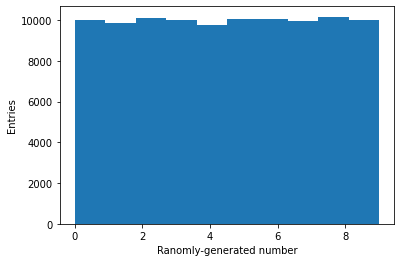

In [16]:
import matplotlib.pyplot as plt

# Geneate 100000 random numbers b/w 0 and 10
n_to_generate = 100000
numbers = [randrange(10) for i in range(n_to_generate)]

# Plot the distribution of the generated numbers
plt.hist(numbers)
plt.xlabel('Ranomly-generated number')
plt.ylabel('Entries')
plt.show()

**Note:** For more options (labels/legends, axis range, etc) please check the matplotlib.pyplot documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

### How to make graphs?

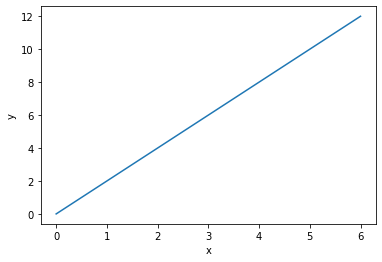

In [17]:
# Let's generate (x,y) points
x = [0, 1, 2, 3, 4, 5, 6]
y = [item * 2 for item in x]

# Let's plot y vs x
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Note: For more options (labels/legends, axis range, etc) please check the matplotlib.pyplot documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

## How to catch errors?

Unexpected behaviour will eventually happen and might cause errors.

In python, these situations are considered as exceptions, each raising different types of errors.

But, Python provides a way to handle/catch exceptions.

### Example 1

Let's say I created a dictionary and then I try to get the value for a given key, but the key doesn't exists (or I don't know if exists). In that case, I can 'try' to get the value and if it 'fails' I show the appropriate error/exception.

```
my_dict = {'a': 1, 'b': 2, 'c':4}

try:
    print(f'{my_dict["d"] = }')
except KeyError:
    raise KeyError("The key 'd' doesn't exists")
```

### Example 2

Let's say I want to take the square root of a value (which only works for positive values), I can use ```try``` and raise an error when it receives a negative value.

```
from math import sqrt

x = -1

try:
    sqrt(x)
except ValueError:
    raise ValueError("It's not possible to take the square root of a negative value")
```

## How to open a file?

Let's use the ```open()``` built-in function to open a text file:

In [18]:
# Open the file
input_file = open('example_text_file.txt', 'r')

# Print its content
print('Content of the "example_text_file.txt" file:')
for line in input_file: # loop over each file and print line's content
    print(line.replace('\n', '')) # remove newline from string

# Close the file!
input_file.close()

Content of the "example_text_file.txt" file:
This is an example text file containing two lines.
This is a second line of text.


**Note*** that I had to close the file with the ```close()``` function!

### How to open a file w/o having to remind myself to close it?

Use ```with open()```. Let's repeat the above example:

In [19]:
# Open the file
with open('example_text_file.txt', 'r') as input_file:

    # Print its content
    print('Content of the "example_text_file.txt" file:')
    for line in input_file: # loop over each file and print line's content
        print(line.replace('\n', '')) # remove newline from string

Content of the "example_text_file.txt" file:
This is an example text file containing two lines.
This is a second line of text.


**Note:** Now ```input_file``` is closed when I leave the ```with``` block and I don't have to explicitely close it.

## How to write a file?

Let's use the ```open()``` function again but this time to write a text file.

In [20]:
with open('output_file.txt', 'w') as output_file:
    output_file.write('My custom text file')
    
# Let's now read it
with open('output_file.txt', 'r') as input_file:
    for line in input_file:
        print(line)

My custom text file


## Open a file and raise an appropriate error if file doesn't exists

In [21]:
try:
    with open('fake_file.txt', 'r') as fake_file:
        for line in fake_file:
            print(line)
except OSError:
    print("The 'fake_file.txt' file doesn't exists (who could have guessed that?)")

The 'fake_file.txt' file doesn't exists (who could have guessed that?)


## How to check a condition and raise an error message if not satisfied?

Use the ```assert``` statement, this is particularly helpful when debugging.

```assert``` takes an expression and an optional message.

<u>Syntax:</u>
```
assert CONDITION, MESSAGE
```

**Example:**
```
x = 10
assert x < 10, 'x is not smaller than 10'
```

# <div align='center'>Exercises</div>

## Exercise 1

Print the difference between a randomly generated number (generated in the 0-100 range) and 13, if the number is larger than 10 return 1, return 0 otherwise

**Answer:**

In [22]:
def check_number(x: int) -> int:
    if x - 13 > 10:
        return 1
    else:
        return 0

from random import randrange

random_number = randrange(100)

print(f'The result of the check for {random_number} gives {check_number(random_number)}')

The result of the check for 34 gives 1


## Exercise 2

Evaluate and plot the function f(x: int) = x^2 for x values in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

**Answer:**

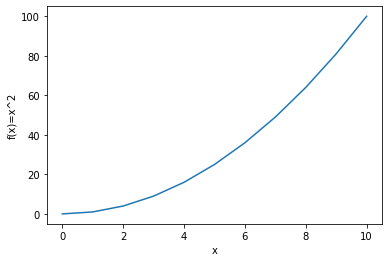

In [23]:
def f(x: int) -> int:
    """f(x) = x^2"""
    return x**2

# Generate x and y values
x = [i for i in range(11)]
y = [f(item) for item in x]

# Plot f(x) vs x
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)=x^2')
plt.show()